# Objetivo

En este trabajo vamos a analizar los datos epidemiológicos generados por el grupo de trabajo [#escovid19data](https://github.com/montera34/escovid19data). Siguiendo los procesos estándares descargaremos los datos desde gitub, analizaremos los campos y prepararemos una serie de gráficas que añadan aunque sea un poco de información a lo que está ocurriendo.


@author: Manuel H. Arias 

@Twitter: @walyt

@mail: mharias@me.com



## Importación de librerias estándares para DAE

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import (YEARLY, MONTHLY, DateFormatter, MonthLocator,DayLocator,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.colors as colors

import numpy as np
from datetime import datetime,timedelta
import seaborn as sns
%matplotlib inline

import urllib.request

import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

## Descargamos la información

Hacemos en primer lugar una actualización de parámetros y preparación de variables que necesitaremos durante el ejercicio

In [2]:
pd.options.display.max_rows = 999 #Variable de contexto para permitir la presentación de datos por pantalla
pd.set_option('display.max_columns', None)

In [3]:
#url de este notebook en github
github_url = 'https://github.com/mharias/covid/blob/master/graficos_escovid19data.ipynb'

In [4]:
hashtag_fuente='#escovid19data' #hashtag de la fuente para los créditos

In [5]:
#url de la fuente de datos
path_montera34='https://github.com/montera34/escovid19data/blob/master/data/output/covid19-provincias-spain_consolidated.csv?raw=true'

Leemos los datos en un `pandas`

In [6]:
df = pd.read_csv(path_montera34)

veamos una rápida descripción de la información:

In [7]:
df.describe()

,ine_code,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,ia14
count,13844.000000,4355.000000,3925.000000,959.000000,1560.000000,9906.000000,9769.000000,11038.000000,7080.000000,8312.000000,7146.000000,13822.000000,13822.000000,13822.000000,13822.000000,13822.000000,1.384400e+04,7080.000000,9769.000000,11038.000000,9906.000000,6228.000000,6607.000000,7602.000000,7922.000000,6902.000000,6538.000000,8888.000000,8524.000000,10970.000000,10276.000,10270.000000,10674.000000,9223.000000,13510.000000,8318.000000
mean,26.500506,59.710677,107.141146,7394.139729,1116.169872,179.139209,24.562391,580.072477,5574.639124,8639.229548,1817.836672,75.065765,69.822891,1.496455,2.384749,1.361670,9.027265e+05,504.401037,2.661817,53.204786,20.362552,1202.597784,597.880884,1430.723494,720.813683,85.335990,84.505659,101.150428,98.381664,3.832543,inf,3.901675,3.782631,28.782934,70.330155,129.806805
std,15.012545,131.600451,217.756238,21865.327207,1575.616462,778.034928,89.359107,1784.792894,13670.555825,24407.737153,2646.839839,265.284175,255.028671,6.512300,35.657480,9.714829,1.173114e+06,542.447865,3.850305,51.047434,41.797412,2644.819562,1363.871568,4309.897169,2170.062155,215.895721,194.546805,332.692405,299.737414,20.220796,NaN,20.493709,19.907835,149.043201,244.037309,159.976616
min,1.000000,-67.000000,-67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.477700e+04,0.000000,0.000000,0.000000,0.000000,-54.000000,-82.000000,-62.000000,-99.000000,-106.000000,-12.000000,-84.000000,-12.700000,-22.000000,-30.800,-1.300000,-3.300000,-4.000000,0.000000,-7.000000
25%,13.000000,3.000000,6.000000,3.000000,172.750000,11.000000,2.000000,91.000000,722.000000,1470.500000,429.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.167980e+05,128.415000,0.300000,13.130000,2.410000,125.000000,55.000000,46.000000,21.000000,5.000000,8.000000,2.000000,3.100000,0.000000,0.000,0.000000,0.000000,1.000000,1.700000,9.000000
50%,26.500000,22.000000,37.000000,23.000000,520.000000,44.000000,6.000000,206.000000,2049.500000,3002.000000,1200.500000,14.000000,11.000000,0.000000,0.000000,0.000000,5.810780e+05,325.025000,1.300000,34.285000,8.690000,516.000000,239.000000,279.000000,137.000000,28.000000,33.900000,17.000000,19.100000,0.000000,0.000,0.700000,0.600000,4.000000,11.900000,58.000000
75%,40.000000,63.000000,112.000000,482.500000,1306.000000,127.000000,20.000000,373.000000,4603.000000,5776.250000,2141.000000,65.000000,59.000000,0.000000,0.000000,0.000000,1.022800e+06,707.425000,3.470000,83.100000,23.037500,1125.000000,558.000000,1147.750000,589.000000,79.000000,79.375000,80.000000,80.300000,2.000000,0.925,2.300000,2.100000,16.000000,61.300000,205.000000
max,52.000000,1992.000000,3444.000000,117877.000000,10275.000000,15227.000000,1528.000000,11888.000000,149640.000000,296929.000000,29753.000000,6743.000000,6730.000000,128.000000,1185.000000,261.000000,6.663394e+06,3687.080000,28.720000,245.080000,474.750000,29954.000000,17440.000000,52884.000000,28390.000000,3450.000000,2491.400000,6832.000000,4055.700000,377.000000,inf,350.700000,339.000000,2373.000000,4168.400000,1005.000000


y un muestreo de valores y de algunas columnas de interés:

In [8]:
df.head()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,ia14,source_name,source,comments
0,2020-01-31,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
1,2020-02-01,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
2,2020-02-02,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
3,2020-02-03,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN
4,2020-02-04,Almería,4,Andalucía,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,716820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISCIII RENAVE,https://cnecovid.isciii.es/covid19/resources/d...,NaN


In [9]:
df.tail()

,date,province,ine_code,ccaa,new_cases,PCR,TestAc,activos,hospitalized,intensive_care,deceased,cases_accumulated,cases_accumulated_PCR,recovered,num_casos,num_casos_prueba_pcr,num_casos_prueba_test_ac,num_casos_prueba_otras,num_casos_prueba_desconocida,poblacion,cases_per_cienmil,intensive_care_per_1000000,deceassed_per_100000,hospitalized_per_100000,cases_14days,cases_7days,cases_PCR_14days,cases_PCR_7days,daily_cases,daily_cases_avg7,daily_cases_PCR,daily_cases_PCR_avg7,daily_deaths,daily_deaths_inc,daily_deaths_avg3,daily_deaths_avg7,deaths_last_week,num_casos_prueba_pcr_avg7,ia14,source_name,source,comments
13839,2020-10-18,"Rioja, La",26,"Rioja, La",NaN,94.0,NaN,NaN,99.0,23.0,439.0,NaN,10591.0,NaN,108.0,82.0,0.0,26.0,0.0,316798,NaN,7.26,138.57,31.25,NaN,NaN,NaN,NaN,NaN,NaN,94.0,136.2,3.0,NaN,NaN,1.5,NaN,123.3,NaN,Ministerio de Sanidad;ISCIII RENAVE,https://www.mscbs.gob.es/profesionales/saludPu...,NaN
13840,2020-10-19,"Rioja, La",26,"Rioja, La",NaN,137.0,NaN,NaN,100.0,20.0,439.0,NaN,10722.0,NaN,89.0,73.0,0.0,14.0,2.0,316798,NaN,6.31,138.57,31.57,NaN,NaN,NaN,1217.0,NaN,NaN,131.0,136.1,0.0,0.0,NaN,1.4,NaN,115.1,NaN,Ministerio de Sanidad;ISCIII RENAVE,https://www.mscbs.gob.es/profesionales/saludPu...,NaN
13841,2020-10-20,"Rioja, La",26,"Rioja, La",NaN,179.0,NaN,NaN,108.0,21.0,440.0,NaN,10876.0,NaN,86.0,80.0,0.0,6.0,0.0,316798,NaN,6.63,138.89,34.09,NaN,NaN,NaN,1207.0,NaN,NaN,154.0,134.7,1.0,0.2,1.3,1.4,NaN,106.6,NaN,Ministerio de Sanidad;ISCIII RENAVE,https://www.mscbs.gob.es/profesionales/saludPu...,NaN
13842,2020-10-21,"Rioja, La",26,"Rioja, La",NaN,238.0,NaN,NaN,111.0,22.0,441.0,NaN,11121.0,NaN,90.0,84.0,0.0,6.0,0.0,316798,NaN,6.94,139.21,35.04,NaN,NaN,2011.0,1270.0,NaN,NaN,245.0,143.7,1.0,0.2,0.7,1.4,NaN,100.3,635.0,Ministerio de Sanidad;ISCIII RENAVE,https://www.mscbs.gob.es/profesionales/saludPu...,El número acumulado de casos y de fallecidos c...
13843,2020-10-22,"Rioja, La",26,"Rioja, La",NaN,174.0,NaN,NaN,116.0,22.0,442.0,NaN,11300.0,NaN,3.0,3.0,0.0,0.0,0.0,316798,NaN,6.94,139.52,36.62,NaN,NaN,2079.0,1319.0,NaN,NaN,179.0,150.7,1.0,0.2,1.0,0.8,NaN,81.7,656.0,Ministerio de Sanidad;ISCIII RENAVE,https://www.mscbs.gob.es/profesionales/saludPu...,El número acumulado de casos y de fallecidos c...


In [10]:
provincias = sorted(df['province'].unique())

Vamos a formatear correctamente la columna `Date`, para posteriormente ordenar el $pandas$ por fecha creciente:

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df.columns

Index(['date', 'province', 'ine_code', 'ccaa', 'new_cases', 'PCR', 'TestAc',
       'activos', 'hospitalized', 'intensive_care', 'deceased',
       'cases_accumulated', 'cases_accumulated_PCR', 'recovered', 'num_casos',
       'num_casos_prueba_pcr', 'num_casos_prueba_test_ac',
       'num_casos_prueba_otras', 'num_casos_prueba_desconocida', 'poblacion',
       'cases_per_cienmil', 'intensive_care_per_1000000',
       'deceassed_per_100000', 'hospitalized_per_100000', 'cases_14days',
       'cases_7days', 'cases_PCR_14days', 'cases_PCR_7days', 'daily_cases',
       'daily_cases_avg7', 'daily_cases_PCR', 'daily_cases_PCR_avg7',
       'daily_deaths', 'daily_deaths_inc', 'daily_deaths_avg3',
       'daily_deaths_avg7', 'deaths_last_week', 'num_casos_prueba_pcr_avg7',
       'ia14', 'source_name', 'source', 'comments'],
      dtype='object')

In [45]:
campos = {'Almería':'daily_cases', 'Cádiz':'daily_cases', 'Córdoba':'daily_cases',
          'Granada':'daily_cases', 'Huelva':'daily_cases', 'Jaén':'daily_cases',
       'Málaga':'daily_cases', 'Sevilla':'daily_cases', 'Huesca':'casos_nuevos_aragon',
          'Teruel':'casos_nuevos_aragon', 'Zaragoza':'casos_nuevos_aragon', 
          'Asturias':'PCR','Balears, Illes':'PCR', 'Palmas, Las':'daily_cases', 
          'Santa Cruz de Tenerife':'daily_cases','Cantabria':'PCR',
          'Albacete':'daily_cases_PCR', 'Ciudad Real':'daily_cases_PCR',
          'Cuenca':'daily_cases_PCR', 'Guadalajara':'daily_cases_PCR',
       'Toledo':'daily_cases_PCR', 'Ávila':'daily_cases_PCR', 'Burgos':'daily_cases_PCR',
          'León':'daily_cases_PCR', 'Palencia':'daily_cases_PCR', 'Salamanca':'daily_cases_PCR',
       'Segovia':'daily_cases_PCR', 'Soria':'daily_cases_PCR', 'Valladolid':'daily_cases_PCR',
          'Zamora':'daily_cases_PCR', 'Barcelona':'daily_cases', 'Girona':'daily_cases',
       'Lleida':'daily_cases', 'Tarragona':'daily_cases', 'Ceuta':'new_cases',
          'Alicante/Alacant':'casos_nuevos_valencia','Castellón/Castelló':'casos_nuevos_valencia',
          'Valencia/València':'casos_nuevos_valencia','Badajoz':'new_cases', 'Cáceres':'new_cases',
       'Coruña, A':'daily_cases', 'Lugo':'daily_cases', 'Ourense':'daily_cases', 
          'Pontevedra':'daily_cases', 'Madrid':'daily_cases_PCR', 'Melilla':'PCR',
       'Murcia':'daily_cases', 'Navarra':'num_casos', 'Araba/Álava':'daily_cases_PCR',
          'Bizkaia':'daily_cases_PCR', 'Gipuzkoa':'daily_cases_PCR',
       'Rioja, La':'PCR'}

# Gráficos

 A continuación vamos a crear un gráfico múltiple que nos permita visualizar cada una de las columnas con datos numéricos. Ello nos permitirá

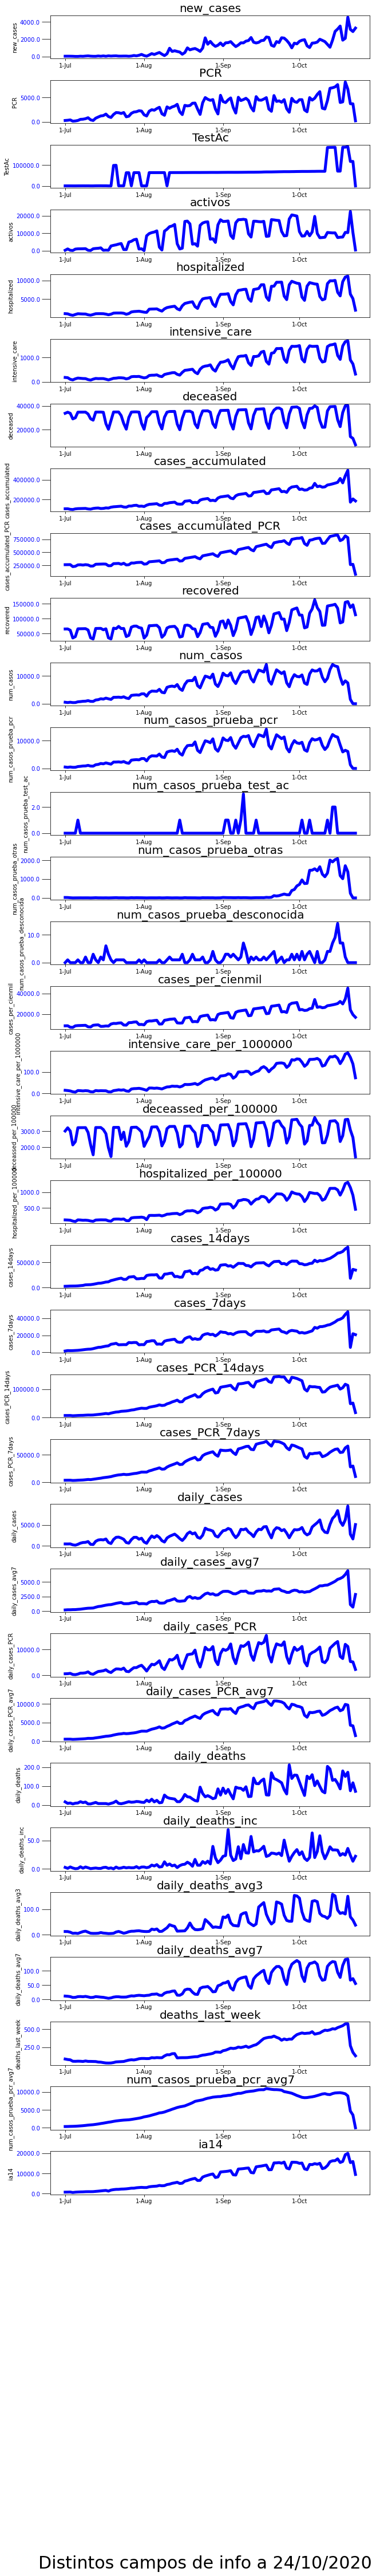

In [16]:
#un par de funciones para formatear

def format_x(value, tick_number):
        return  datetime.fromordinal(int(value)).strftime('%d-%b')

    
def format_y(value, tick_number):
        return  '{:.1f}'.format(value)
    
#preparamos los  datos: eliminamos las columnas no numéricas al no poderse representar gráficamente
#generamos un pandas 'datos'que habremos filtrado desde la fecha de los datos que queremos representrar

a_borrar=['date','poblacion','province','ine_code','ccaa','source_name','source','comments']
claves=list(df.columns)
for i in a_borrar:
    claves.remove(i) 

datos = df.fillna(0,axis=1)
datos = datos[datos['date']>=datetime(year=2020,month=7,day=1)]
    
    
#vamos a generar un gráfico matplotlib en al que añadiremos cada una de las columnas
f = plt.figure(figsize=(10,70))
f.subplots_adjust(hspace=.5, wspace=.5)
f.suptitle('Distintos campos de info a '+datetime.today().strftime('%d/%m/%Y')
           ,fontsize=30,y=0)

#sns.set_style("whitegrid")
#sns.set_palette(sns.color_palette("RdBu_r",19))

#iteramos sobre la lista de columnas y las añadimos como un eje adicional
for i,clave in enumerate(claves):
    axe=f.add_subplot(len(claves),1,i+1)
    
    data1=datos.pivot_table(index=['date'],values=[clave],aggfunc=np.sum)
    
    axe.set_title(clave,size=20)
    sns.lineplot(data1.index, data1[clave], ax=axe,color='blue',linewidth=5)
    axe.tick_params(axis='y', labelcolor='blue',size=15)
    
    axe.yaxis.set_major_formatter(plt.FuncFormatter(format_y))    
    axe.xaxis.set_major_locator(DayLocator([1]))

    majorFmt = DateFormatter('%-d-%b')
    axe.xaxis.set_major_formatter(majorFmt)
    axe.set_xlabel('')
    
#f.tight_layout()  # otherwise the right y-label is slightly clipped
#f.savefig('graficos/grafic

Una vez analizadas cada una de las columnas de datos podremos elegir las que queremos presentar..

Preparemos un gráfico tipo [Facetgrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), al que añadiremos tantos gráficos como provincias, presentando una de las columnas de datos. Elegimos nº de hospitalizados por 100.000 habitantes. Dejo otras claves con `#` para que fácilmente se puedan generar. Este ejemplo esta basado en el código del link anterior.

In [77]:
sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})

# Preparamos los datos. Es importante añadir un zero a los campos NotANumber..


datos = df.fillna(0,axis=1)
datos = datos.sort_values(by=['province','date'], inplace=False, ascending=True)
provincias = sorted(df['province'].unique())
datos = datos[(datos['date']>=datetime(year=2020,month=7,day=20)) & (datos['province'].isin(provincias))]

clave_avg='daily_cases_PCR_avg7'
clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
color_ratio = 'red'
color_fill = 'royalblue'
color_titulos = 'navy'
color_linea='darkred'
clave_ratio = 'tasa_ia_7_dias'
AI='incidencia_acumulada_14'
casos_nuevos='casos_nuevos'
casos_nuevos_valencia='casos_nuevos_valencia'
casos_nuevos_aragon = 'casos_nuevos_aragon'
ventana_IA=14
titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
y_IA='IA a 14 días'
y_ratio='Ratio a 7 días'
valencia=['Alicante/Alacant','Castellón/Castelló', 'Valencia/València']
aragon = ['Zaragoza','Huesca','Teruel']
for provincia in valencia:
    datos.loc[datos['province']==provincia,casos_nuevos_valencia]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

for provincia in aragon:
    datos.loc[datos['province']==provincia,casos_nuevos_aragon]=\
    datos.loc[datos['province']==provincia,'PCR']+\
    datos.loc[datos['province']==provincia,'new_cases']

    
    
for provincia in provincias:
    
    datos.loc[datos['province']==provincia,AI]=\
    datos.loc[datos['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
    /datos.loc[datos['province']==provincia,'poblacion']*100000

    serie=datos.loc[datos['province']==provincia,AI].pct_change(periods=7).add(1)
    datos.loc[datos['province']==provincia,clave_ratio]=serie  
    

    


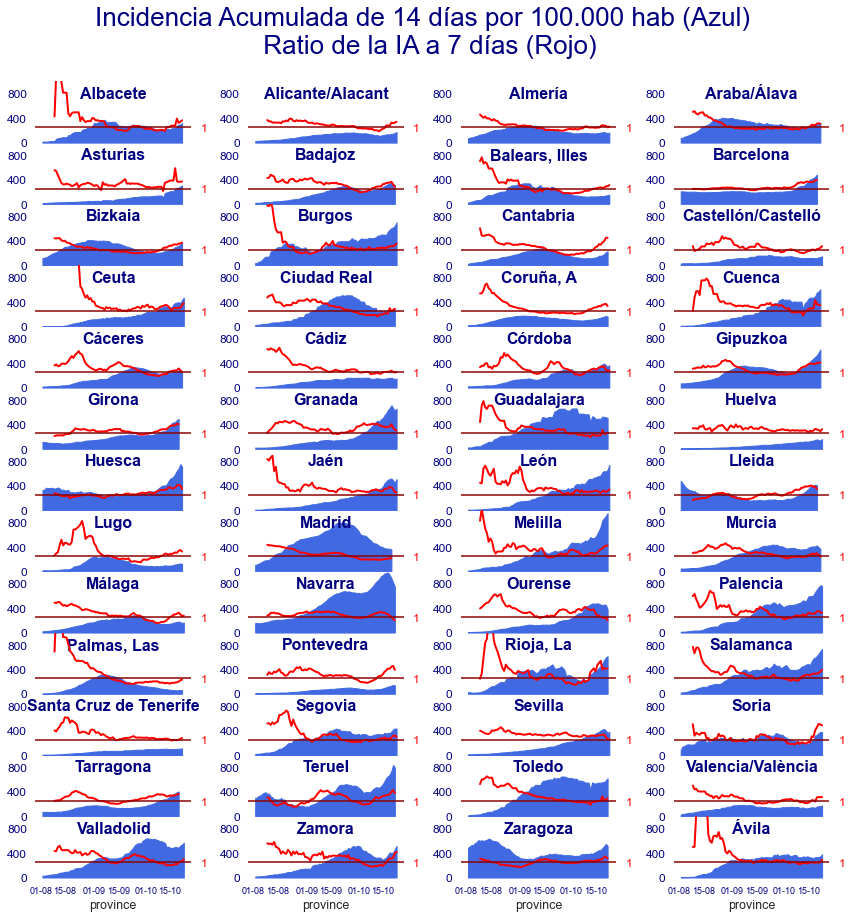

In [78]:
# Creamos la figura desde Matplotlib
#plt.figure()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
with sns.plotting_context('paper', font_scale = 1.3):
    g = sns.FacetGrid(datos,col='province', hue='province',col_wrap=4,aspect=3, 
                      margin_titles=False,height=1.0, palette=pal)
# Título



#g.fig.text(1, 0,'Fuente: {}'.format(hashtag_fuente), fontsize=10,horizontalalignment='right') #add text
#g.fig.text(1,0.01,'Código:{}'.format(github_url),
          # fontsize=10,horizontalalignment='right')
# Draw the densities in a few steps

XmajorFmt = DateFormatter('%d-%m')
def grafica(x, color, label):
    ax1 = plt.gca()
    df_datos= datos.loc[datos['province'] == label]
    #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
    ax1.text(0.5, .8, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax1.transAxes)
    ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
    ax1.set_ylim(0,1000)
    ax1.set_yticks([0,400,800])
    ax1.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_titulos)
    ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax1.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
    ax1.set_xticks([])
    
    ax2 = ax1.twinx()
    ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=2, color=color_ratio)
    ax2.yaxis.set_tick_params(labelsize=12,width=0,labelcolor=color_ratio)
    ax2.set_ylim(0,4)
    ax2.set_yticks([1])
    ax2.xaxis.set_major_formatter(XmajorFmt)
    #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
    ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
    #x0,x1=ax2.get_xlim()
    ax2.axhline(1,color=color_linea)
g.map(grafica,'province')


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.5, .5, label, fontweight="bold", color=color_titulos,
            ha="center", va="center", size=16,transform=ax.transAxes)

#g.map(label,'province')


# Establecemos la distancia entre gráficos verticalmente para que no haya solapes
g.fig.subplots_adjust(hspace=0)

# Quitamos los títulos, título del eje x, y todos los ticks de y
g.set_titles("")
#g.set(yticks=[])
#g.set(xlabel='')

# Formateamos el gráfico: numero de xticks, formato de la etiqueta, colores...

#for ax in g.axes:
#    ax.xaxis.set_major_formatter(XmajorFmt)
 #   ax.xaxis.set_tick_params(labelsize=9,labelcolor='navy')
 #   ax.xaxis.set_major_locator(DayLocator([1,15]))
    
#    ax.yaxis.set_tick_params(labelsize=12,labelcolor='navy')
#    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
# [plt.setp(ax.texts, text="") for ax in g.axes.flat] 
# quitamos los ejes para dar más claridad a cada gráfico
g.despine(bottom=True, left=True)
#plt.tight_layout(w_pad=1,h_pad=10,pad=10)

#g.fig.subplots_adjust(top=.7)
g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
g.fig.subplots_adjust(top=.9)
plt.savefig('graficos/pcr_provincias.png',dpi=100)  
#plt.tight_layout()
plt.show()
#plt.close()


#sns.set(style="white",rc={"axes.facecolor": (0, 0, 0, 0)})


# Gráficos de una lista específica de provincias

Y ahora preparemos gráficos más específicos por Comunidades siguiendo con el modelo `facetgrid` de `seaborn`. Veremos que en cada sección de preparación de datos filtraremos por la lista de provincias de cada comunidad.

In [132]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid, con un solo map
    
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    
    datos_ = datos[(datos['date']>=datetime(year=2020,month=7,day=1)) & (datos['province'].isin(provincias))]

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
   

    XmajorFmt = DateFormatter('%d-%m')
    def grafica(x, color, label):
        ax1 = plt.gca()
        df_datos= datos_.loc[datos['province'] == label]
        #ax1.fill_between(datos['date'].unique(), datos[AI],color=color_diarios)
        ax1.text(0.5, .9, label, fontweight="bold", color=color_titulos,
                ha="center", va="center", size=16,transform=ax1.transAxes)
        ax1.fill_between(df_datos['date'].unique(), df_datos[AI],color=color_fill)
    
    
    
        ax1.set_ylim(0,1000)
        ax1.set_yticks([0,400,800])
        ax1.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_titulos)
        ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
        ax1.xaxis.set_tick_params(labelsize=14,labelcolor='navy')
        ax1.set_xticks([])
        ax1.grid(True,axis='y',which='both')
        
        ax2 = ax1.twinx()
        ax2.plot(df_datos['date'].unique(), df_datos[clave_ratio], lw=3, color=color_ratio)
        ax2.yaxis.set_tick_params(labelsize=18,width=0,labelcolor=color_ratio)
        ax2.set_ylim(0,4)
        ax2.set_yticks([1])
        ax2.xaxis.set_major_formatter(XmajorFmt)
        #ax2.xaxis.set_tick_params(labelsize=20,labelcolor='navy')
        ax2.xaxis.set_major_locator(DayLocator([1,15]))
    
    
        #x0,x1=ax2.get_xlim()
        ax2.axhline(1,color=color_linea)
    
    g.map(grafica,'province')



    g.set_titles('')
    
    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    g.despine(bottom=True, left=True)
    
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=100)  
    plt.show()
    return

In [84]:
def grafico_IA14_ratio(datos, campo_casos, provincias,nombre_fichero):
#con facetgrid pero con varias funcionaes para el segundo eje y
    clave_avg='daily_cases_PCR_avg7'
    clave_ratio_avg = 'ratio_daily_cases_PCR_avg7'
    color_avg = 'darkred'
    color_titulos = 'navy'
    color_diarios = 'royalblue'
    clave_ratio = 'tasa_ia_7_dias'
    AI='incidencia_acumulada_14'
    casos_nuevos='daily_cases'
    ventana_IA=14
    titulo = 'Incidencia Acumulada de 14 días por 100.000 hab (Azul) \n Ratio de la IA a 7 días (Rojo)'
    y_IA='IA a 14 días'
    y_ratio='Ratio a 7 días'
    n_cajas = len(provincias)
    if n_cajas<=3:
        columnas=n_cajas
    elif n_cajas==4:
        columnas = 2
    else:
        columnas = 3
    
    datos_ = datos.fillna(0,axis=1)
    datos_ = datos_[(datos_['date']>=datetime(year=2020,month=7,day=1)) & (datos_['province'].isin(provincias))]

    for provincia in provincias:
        datos_.loc[datos_['province']==provincia,AI]=\
        datos_.loc[datos_['province']==provincia,campos[provincia]].rolling(ventana_IA).sum()\
        /datos_.loc[datos_['province']==provincia,'poblacion']*100000

        serie=datos_.loc[datos_['province']==provincia,AI].pct_change(periods=7).add(1)
        datos_.loc[datos_['province']==provincia,clave_ratio]=serie    
    

    f = plt.figure(figsize=(10,5))

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(52, rot=-.25, light=.7)
    g = sns.FacetGrid(datos_,col='province', hue='province', margin_titles=False, col_wrap=columnas,aspect=1.5, 
                  height=4, palette=pal)
    # Título
    #g.fig.set_figwidth(20)
    #g.fig.set_figheight(10)
    #g.fig.suptitle(titulo,fontsize=30,color=color_titulos)
    #g.fig.text(0.1, 0.04, 'Fuente:{}'.format(path_montera34[:-9]), horizontalalignment='left',verticalalignment='center', 
    #       fontsize=24,color=color_titulos)

    #g.fig.text(0.1,0.01,'Código:{}'.format(github_url),
    #           fontsize=24,horizontalalignment='left',color=color_titulos)


    XmajorFmt = DateFormatter('%d-%b')

    g.map(plt.fill_between, 'date',AI,color=color_diarios)

    ejes = g.axes

    for i,ax in enumerate(ejes):
        #ax.set_title('')
        ax.xaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_titulos)
        ax.grid(False)
        lista_y = ax.get_yticks()
        ax.set_yticks([0,200,400,600,800])
        ax.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_titulos)
        ax.set_xlabel('')
        if i % columnas ==0:
            #ax.set_yticks([0,200,400,600,800])
            ax.yaxis.set_tick_params(labelsize=24,labelcolor=color_titulos)
            ax.yaxis.set_major_locator(plt.MaxNLocator(4))
            ax.set_ylabel(y_IA,size=20,color=color_avg)
        
    
        ax2 = ax.twinx()
        ax2.grid(True)
        ax2.set_yticks([0,1,2,3])
        ax2.yaxis.set_tick_params(labelsize=0,width=0,labelcolor=color_avg)
        ax2.set_ylim(0,5)
        ax2.plot(datos_['date'].unique(), datos_[datos_['province'] == provincias[i]][clave_ratio], lw=3, color=color_avg)
    
        ax2.xaxis.set_major_formatter(XmajorFmt)
        ax2.xaxis.set_tick_params(labelsize=14,width=5,labelcolor=color_titulos)
        ax2.xaxis.set_major_locator(DayLocator([1]))
        ax2.set_xlabel('')
        ax2.set_title('')
    
        if i % columnas == columnas-1:
        
            ax2.yaxis.set_tick_params(labelsize=24,width=5,labelcolor=color_avg)
            #ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
            ax2.set_yticks([0,1,2,3])
            ax2.set_ylabel(y_ratio,size=20,color=color_avg)
# Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        #ax.set_title('')
        #ax.set_suptitle('')
        ax.text(0.8, .9, label, fontweight="bold",
            ha="center", va="center", size=24,transform=ax.transAxes,color=color_titulos)
    g.map(label,'province')


    axes = g.axes.flatten()
    for ax in axes:
        ax.set_xlabel("")
    #    ax.set_ylabel('')
    g.set_titles('')




    # Establecemos la distancia entre gráficos verticalmente para que no haya solapes
    #g.fig.subplots_adjust(hspace=0.1,wspace=.1)
    g.fig.suptitle('{}'.format(titulo),fontsize=26,color='navy')
    g.fig.subplots_adjust(top=.8)
    #plt.tight_layout(w_pad=1,h_pad=5,pad=5)
    
    plt.savefig('graficos/'+nombre_fichero+'.png',dpi=100)  
    plt.show()
    return

<Figure size 720x360 with 0 Axes>

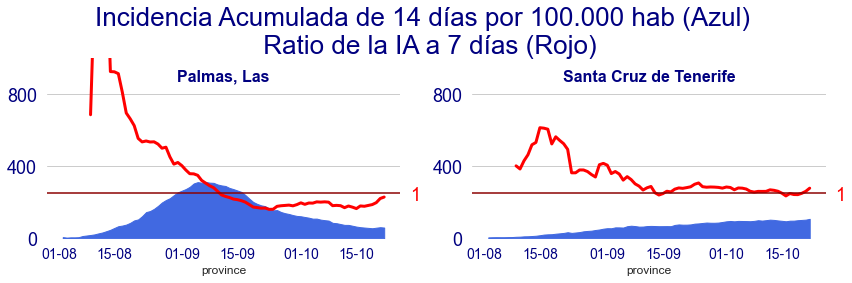

In [133]:
grafico_IA14_ratio(datos,campos,['Palmas, Las', 'Santa Cruz de Tenerife'],'canarias')

<Figure size 720x360 with 0 Axes>

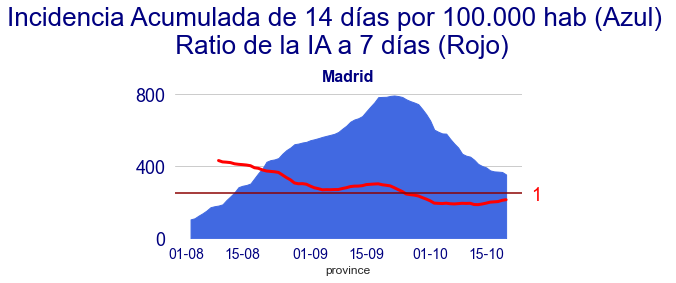

In [134]:
grafico_IA14_ratio(datos,campos,['Madrid'],'madrid')

<Figure size 720x360 with 0 Axes>

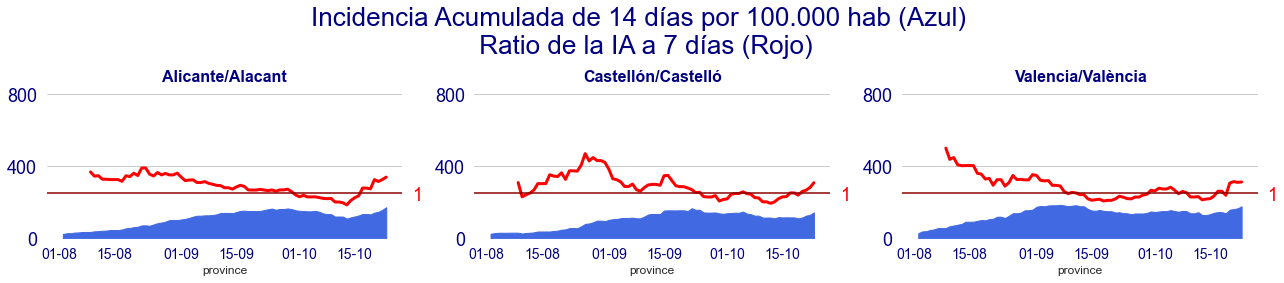

In [135]:
grafico_IA14_ratio(datos,campos,['Alicante/Alacant','Castellón/Castelló', 'Valencia/València'],'valencia')

<Figure size 720x360 with 0 Axes>

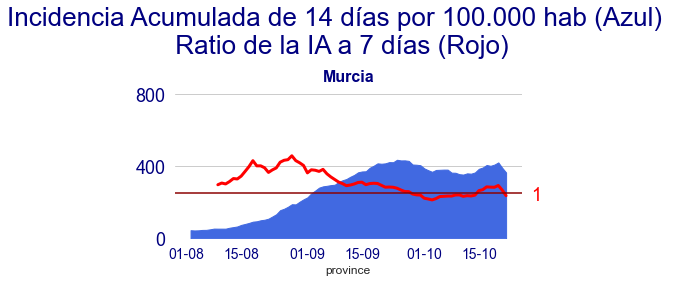

In [136]:
grafico_IA14_ratio(datos,campos,['Murcia'],'murcia')

<Figure size 720x360 with 0 Axes>

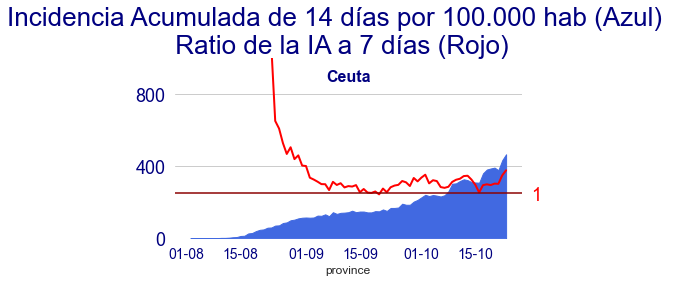

In [114]:
grafico_IA14_ratio(datos,campos,['Ceuta'],'ceuta')

<Figure size 720x360 with 0 Axes>

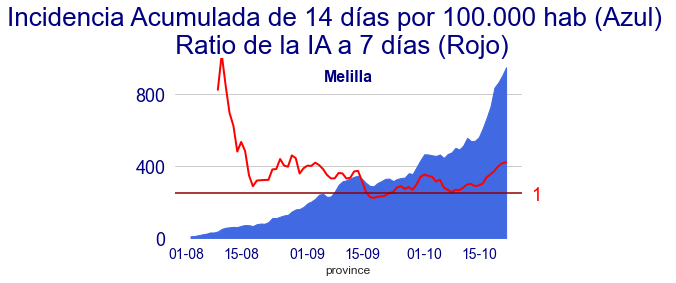

In [115]:
grafico_IA14_ratio(datos,campos,['Melilla'],'melilla')

<Figure size 720x360 with 0 Axes>

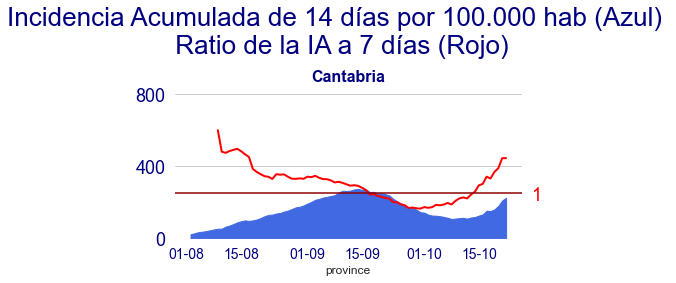

In [116]:
grafico_IA14_ratio(datos,campos,['Cantabria'],'cantabria')

<Figure size 720x360 with 0 Axes>

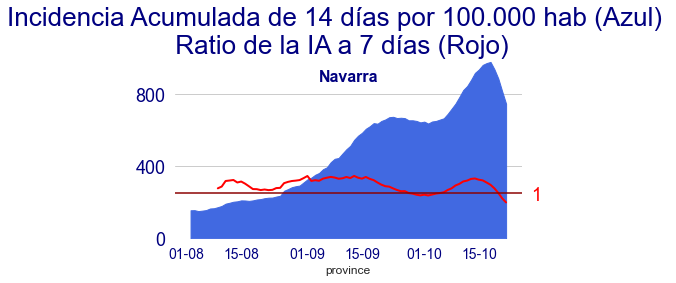

In [117]:
grafico_IA14_ratio(datos,campos,['Navarra'],'navarra')

<Figure size 720x360 with 0 Axes>

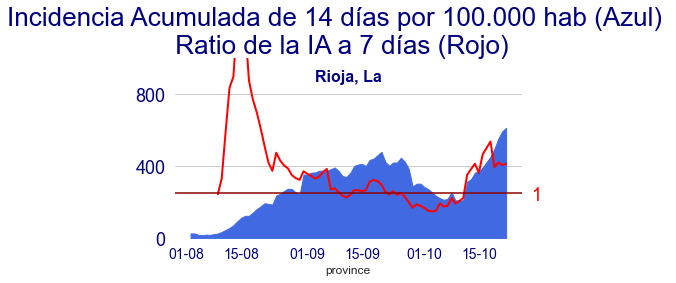

In [118]:
grafico_IA14_ratio(datos,campos,['Rioja, La'],'rioja')

<Figure size 720x360 with 0 Axes>

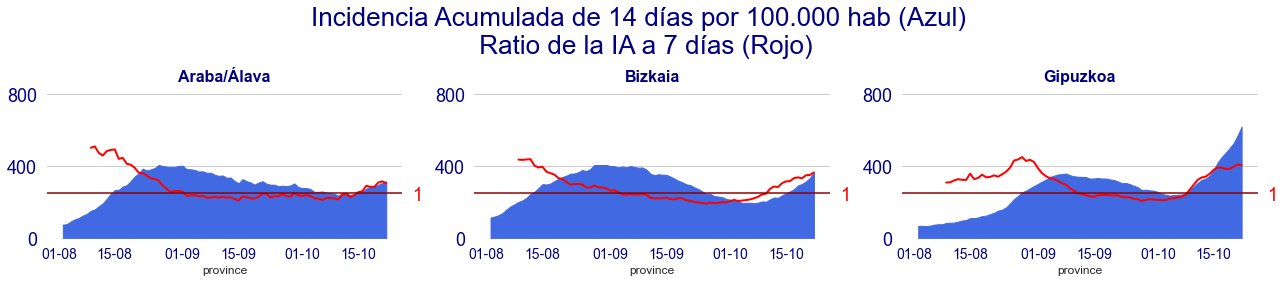

In [119]:
grafico_IA14_ratio(datos,campos,['Bizkaia','Araba/Álava','Gipuzkoa'],'paisvasco')

<Figure size 720x360 with 0 Axes>

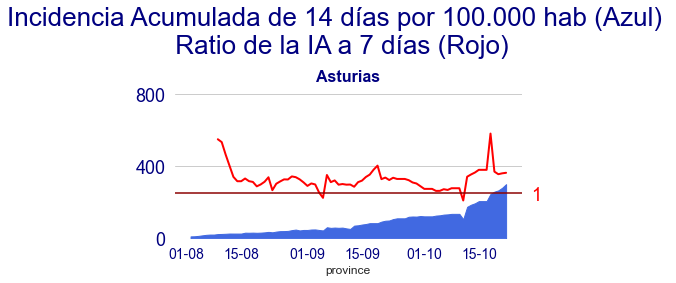

In [120]:
grafico_IA14_ratio(datos,campos,['Asturias'],'asturias')

<Figure size 720x360 with 0 Axes>

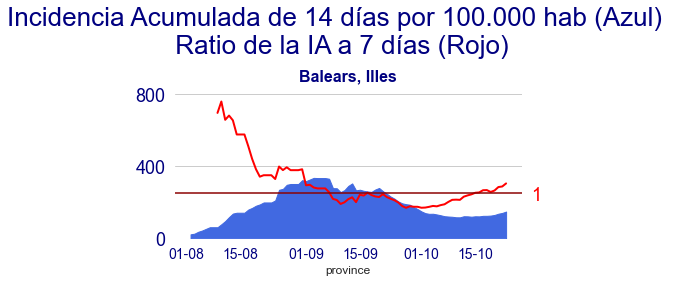

In [121]:
grafico_IA14_ratio(datos,campos,['Balears, Illes'],'baleares')

<Figure size 720x360 with 0 Axes>

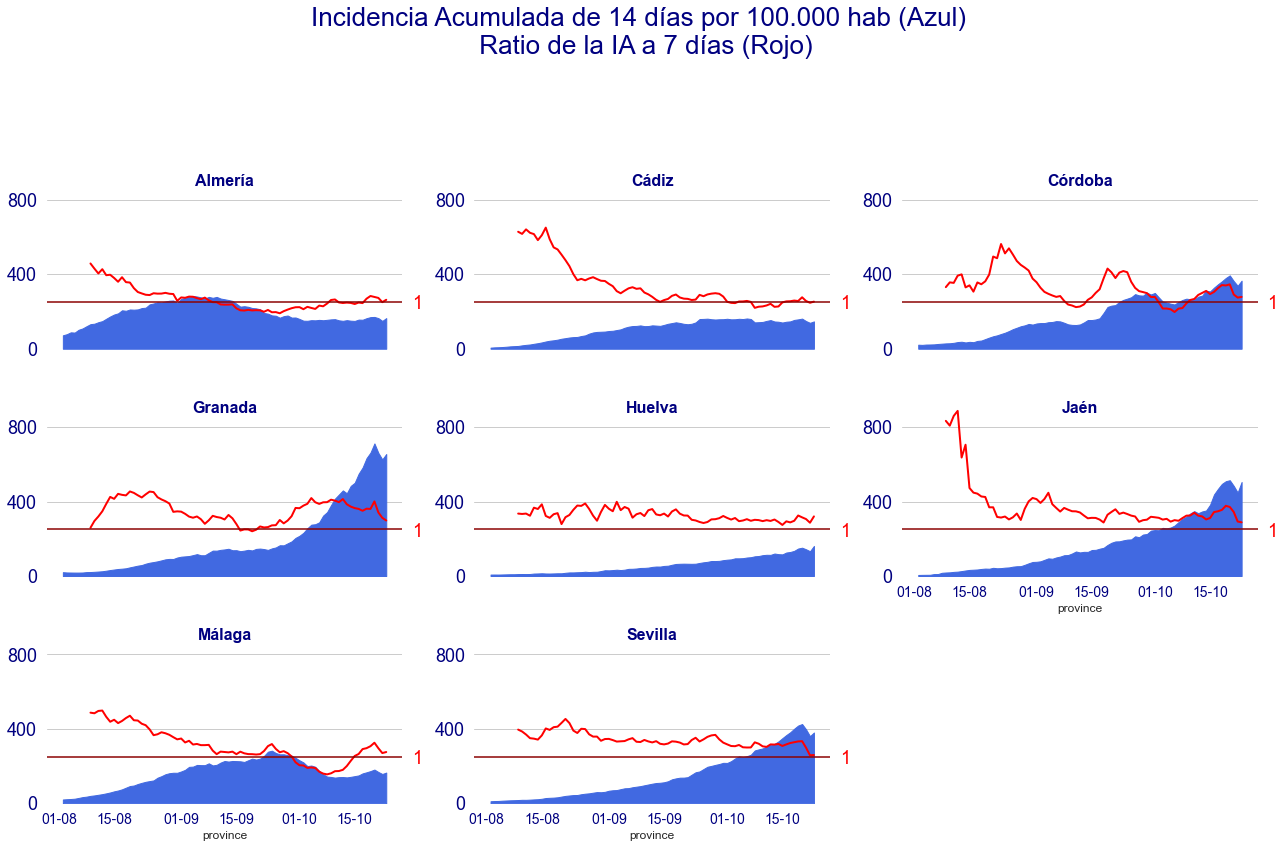

In [122]:
grafico_IA14_ratio(datos,campos,['Almería','Cádiz','Córdoba','Granada','Huelva','Jaén','Málaga','Sevilla'],'andalucia')

<Figure size 720x360 with 0 Axes>

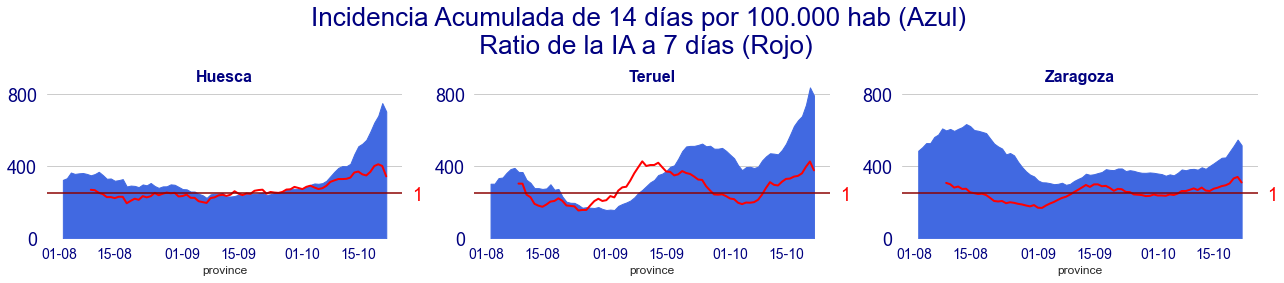

In [123]:
grafico_IA14_ratio(datos,campos,['Huesca','Teruel','Zaragoza'],'aragon')

<Figure size 720x360 with 0 Axes>

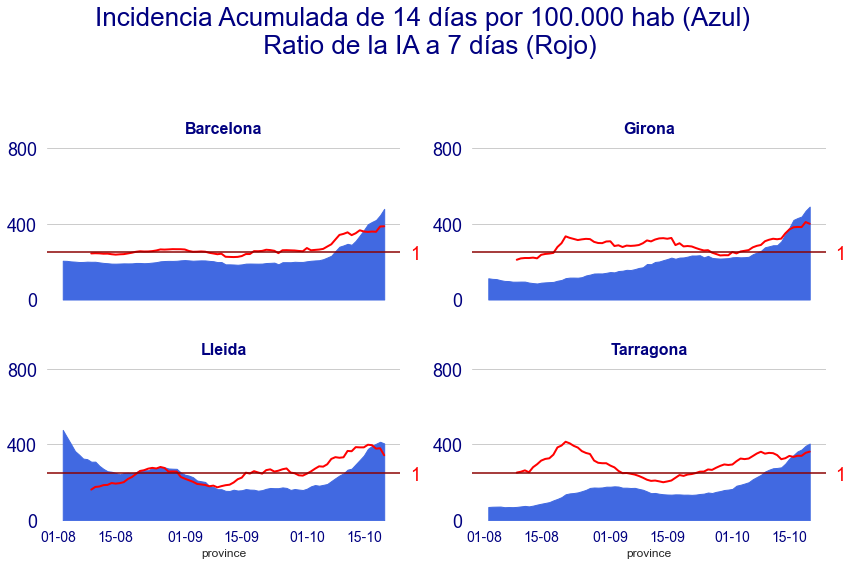

In [124]:
grafico_IA14_ratio(datos,campos,['Barcelona','Tarragona','Girona','Lleida'],'cataluña')

<Figure size 720x360 with 0 Axes>

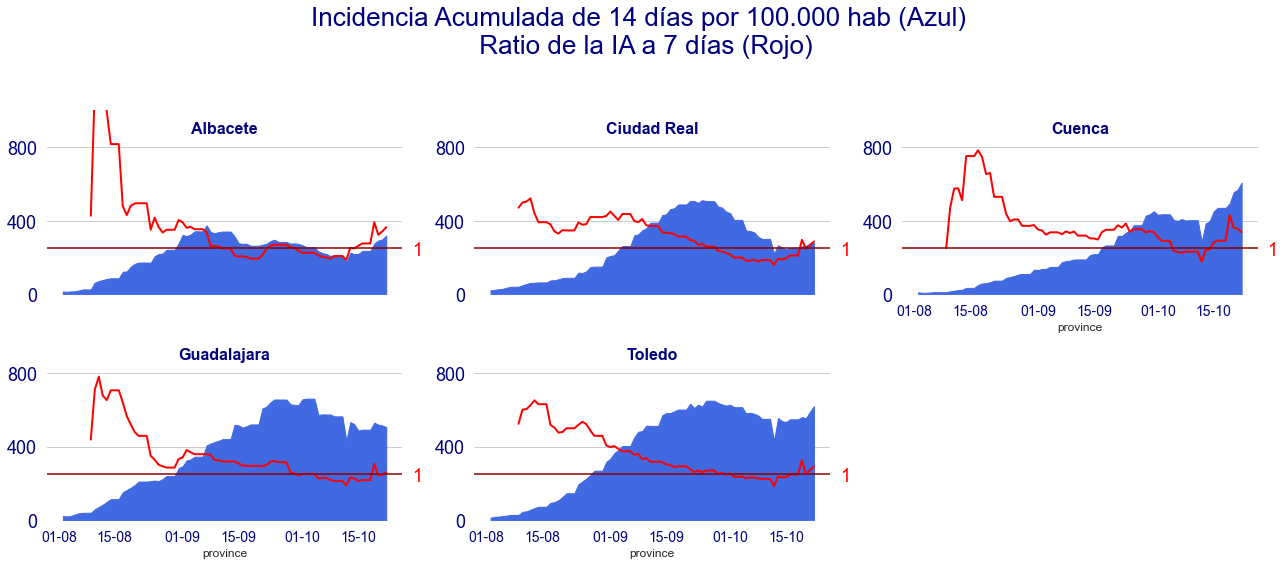

In [125]:
grafico_IA14_ratio(datos,campos,['Albacete','Ciudad Real','Cuenca','Guadalajara','Toledo'],'castilla_lamancha')

<Figure size 720x360 with 0 Axes>

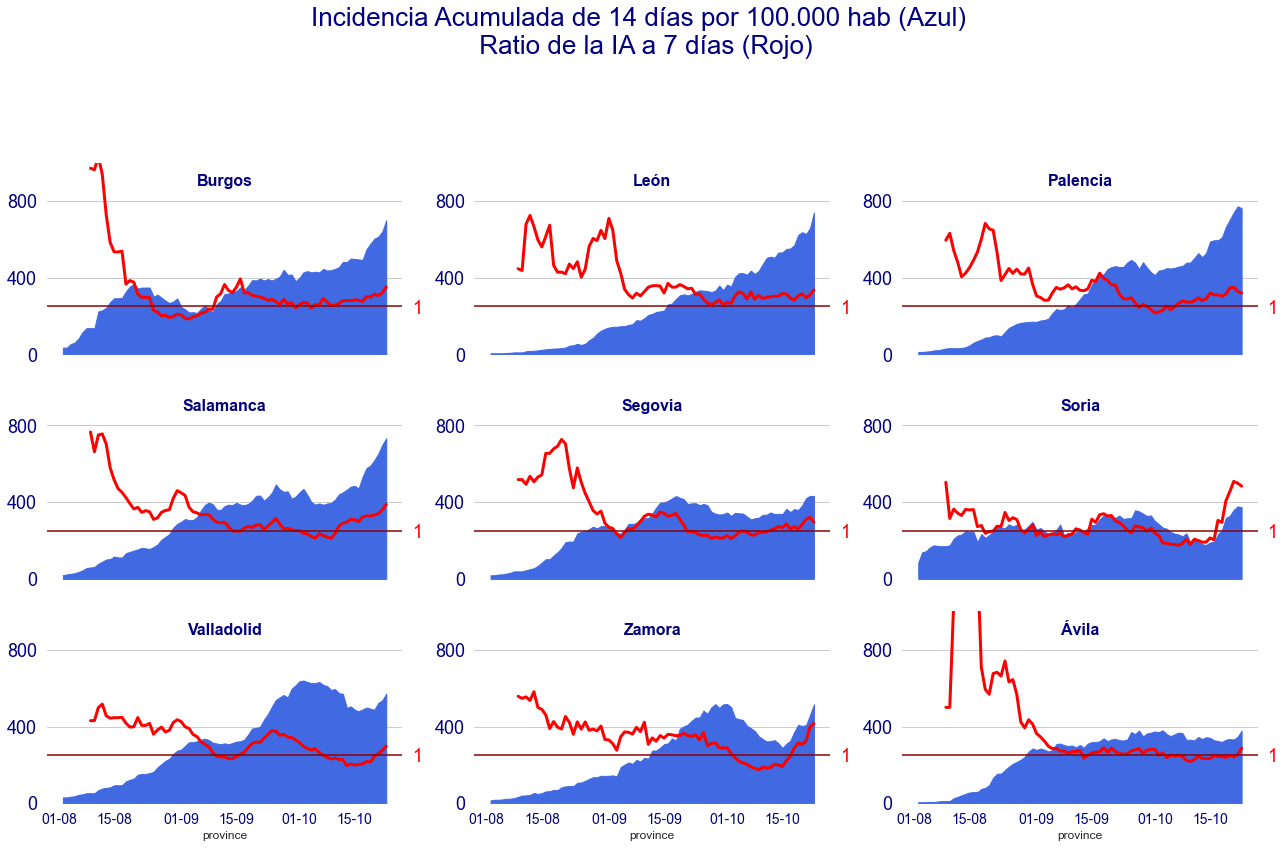

In [137]:
grafico_IA14_ratio(datos,campos,['Ávila','Burgos','León','Palencia','Segovia','Soria','Salamanca','Valladolid','Zamora']
                  ,'castilla_leon')

<Figure size 720x360 with 0 Axes>

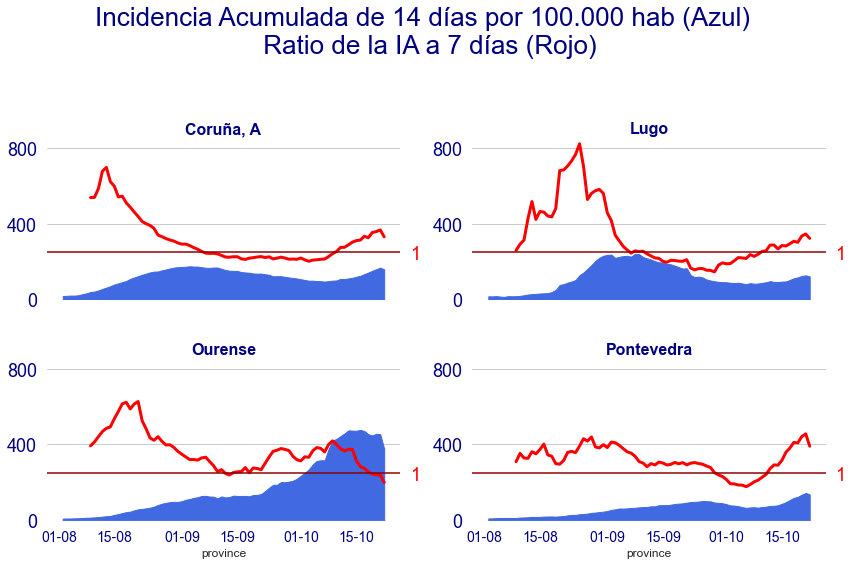

In [138]:
grafico_IA14_ratio(datos,campos,['Coruña, A','Lugo','Ourense','Pontevedra'],'galicia')

<Figure size 720x360 with 0 Axes>

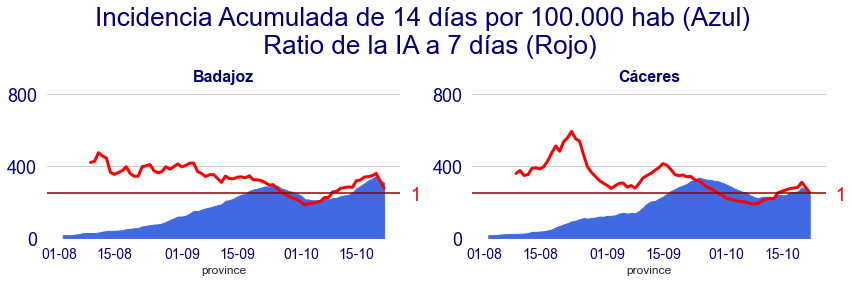

In [139]:
grafico_IA14_ratio(datos,campos,['Badajoz','Cáceres'],'extremadura')